# Implement Two Layer Neural Network

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward Propagation: compute scores

In [3]:
scores = net.loss(X)
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward Propagation: compute loss

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward Propagation

In [5]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b2 max relative error: 4.447646e-11
b1 max relative error: 2.738421e-09


# Train the toy network

Final training loss:  0.017149607938732048


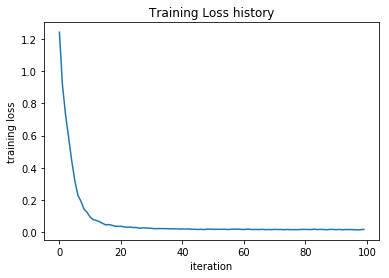

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the Data

In [7]:
from utils import load_data

def get_data(num_training=25709, num_validation=3000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_pub_test))
    X_pub_test = X_pub_test[mask]
    y_pub_test = y_pub_test[mask]
    mask = list(range(num_pri_test))
    X_pri_test = X_pri_test[mask]
    y_pri_test = y_pri_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_pub_test -= mean_image
    X_pri_test -= mean_image
#     X_train /= np.std(X_train, axis = 0)
#     X_val /= np.std(X_val, axis = 0)
#     X_pub_test /= np.std(X_pub_test, axis = 0)
#     X_pri_test /= np.std(X_pri_test, axis = 0)

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_pub_test = X_pub_test.reshape(num_pub_test, -1)
    X_pri_test = X_pri_test.reshape(num_pri_test, -1)
    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Train data shape:  (25709, 2304)
Train labels shape:  (25709,)
Validation data shape:  (3000, 2304)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 2304)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 2304)
Private test labels shape:  (1000,)


# Train a network using SGD

In [8]:
input_size = 48*48
hidden_size = 50
num_classes = 7
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 1.946186
iteration 100 / 1000: loss 1.945325
iteration 200 / 1000: loss 1.941409
iteration 300 / 1000: loss 1.906994
iteration 400 / 1000: loss 1.846881
iteration 500 / 1000: loss 1.800011
iteration 600 / 1000: loss 1.807713
iteration 700 / 1000: loss 1.812406
iteration 800 / 1000: loss 1.798105
iteration 900 / 1000: loss 1.829841
Validation accuracy:  0.248


# Debug the training

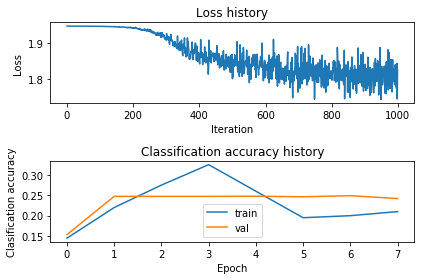

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.tight_layout()
plt.show()


(2304, 50)


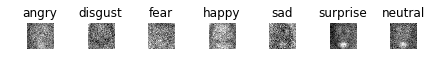

In [16]:
from vis_utils import visualize_grid

def show_net_weights(net, hidden_size):
    # Visualize the learned weights for each class.
    # Depending on your choice of learning rate and regularization strength, these may
    # or may not be nice to look at.
    w = net.params['W1']
    print(w.shape)
    w = w.reshape(48, 48, hidden_size)
    w_min, w_max = np.min(w), np.max(w)
    classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    for i in range(7):
        plt.subplot(1, 7, i + 1)

        # Rescale the weights to be between 0 and 255
        wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
        plt.imshow(wimg.astype('uint8'))
        plt.axis('off')
        plt.title(classes[i])
    plt.tight_layout()
show_net_weights(net, hidden_size)

( 0 / 10 )
iteration 0 / 1500: loss 1.945865
iteration 100 / 1500: loss 1.833332
iteration 200 / 1500: loss 1.759060
iteration 300 / 1500: loss 1.691562
iteration 400 / 1500: loss 1.608172
iteration 500 / 1500: loss 1.607807
iteration 600 / 1500: loss 1.593617
iteration 700 / 1500: loss 1.644770
iteration 800 / 1500: loss 1.520611
iteration 900 / 1500: loss 1.470174
iteration 1000 / 1500: loss 1.613461
iteration 1100 / 1500: loss 1.588161
iteration 1200 / 1500: loss 1.562661
iteration 1300 / 1500: loss 1.464262
iteration 1400 / 1500: loss 1.464468


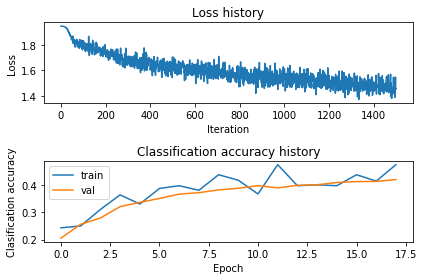

( 1 / 10 )
iteration 0 / 1500: loss 1.945878
iteration 100 / 1500: loss 1.884029
iteration 200 / 1500: loss 1.846392
iteration 300 / 1500: loss 1.768480
iteration 400 / 1500: loss 1.756166
iteration 500 / 1500: loss 1.767256
iteration 600 / 1500: loss 1.697257
iteration 700 / 1500: loss 1.730907
iteration 800 / 1500: loss 1.646114
iteration 900 / 1500: loss 1.655369
iteration 1000 / 1500: loss 1.632789
iteration 1100 / 1500: loss 1.651533
iteration 1200 / 1500: loss 1.644896
iteration 1300 / 1500: loss 1.608465
iteration 1400 / 1500: loss 1.631354


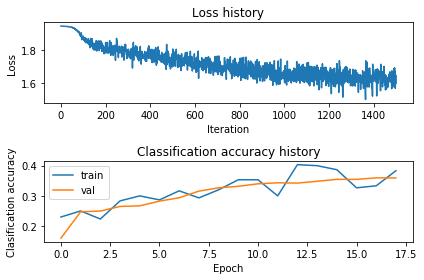

( 2 / 10 )
iteration 0 / 1500: loss 1.945844
iteration 100 / 1500: loss 1.791972
iteration 200 / 1500: loss 1.677057
iteration 300 / 1500: loss 1.612340
iteration 400 / 1500: loss 1.613671
iteration 500 / 1500: loss 1.623184
iteration 600 / 1500: loss 1.522561
iteration 700 / 1500: loss 1.537320
iteration 800 / 1500: loss 1.498963
iteration 900 / 1500: loss 1.463859
iteration 1000 / 1500: loss 1.413442
iteration 1100 / 1500: loss 1.361136
iteration 1200 / 1500: loss 1.484037
iteration 1300 / 1500: loss 1.434536
iteration 1400 / 1500: loss 1.319455


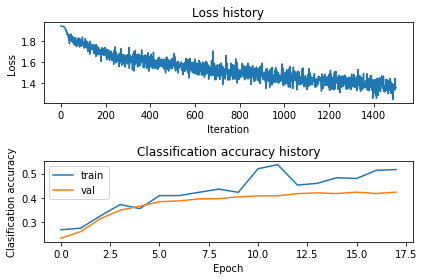

( 3 / 10 )
iteration 0 / 1500: loss 1.945940
iteration 100 / 1500: loss 1.847743
iteration 200 / 1500: loss 1.812062
iteration 300 / 1500: loss 1.766119
iteration 400 / 1500: loss 1.784939
iteration 500 / 1500: loss 1.727834
iteration 600 / 1500: loss 1.689547
iteration 700 / 1500: loss 1.679434
iteration 800 / 1500: loss 1.684839
iteration 900 / 1500: loss 1.668661
iteration 1000 / 1500: loss 1.629606
iteration 1100 / 1500: loss 1.621880
iteration 1200 / 1500: loss 1.592010
iteration 1300 / 1500: loss 1.624317
iteration 1400 / 1500: loss 1.585447


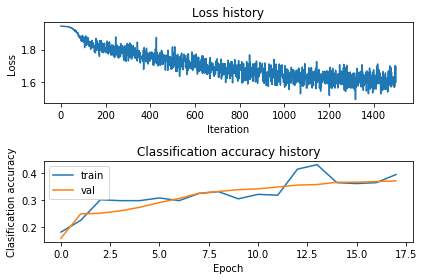

( 4 / 10 )
iteration 0 / 1500: loss 1.945934
iteration 100 / 1500: loss 1.937766
iteration 200 / 1500: loss 1.880057
iteration 300 / 1500: loss 1.836302
iteration 400 / 1500: loss 1.792969
iteration 500 / 1500: loss 1.825660
iteration 600 / 1500: loss 1.781426
iteration 700 / 1500: loss 1.774711
iteration 800 / 1500: loss 1.767310
iteration 900 / 1500: loss 1.773205
iteration 1000 / 1500: loss 1.793757
iteration 1100 / 1500: loss 1.764480
iteration 1200 / 1500: loss 1.737314
iteration 1300 / 1500: loss 1.778179
iteration 1400 / 1500: loss 1.783241


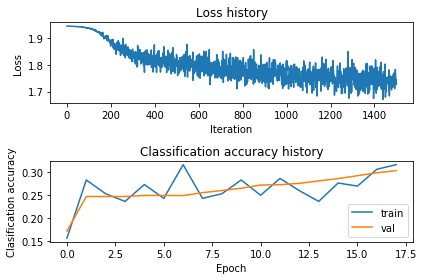

( 5 / 10 )
iteration 0 / 1500: loss 1.945888
iteration 100 / 1500: loss 1.875200
iteration 200 / 1500: loss 1.801468
iteration 300 / 1500: loss 1.796505
iteration 400 / 1500: loss 1.753098
iteration 500 / 1500: loss 1.731298
iteration 600 / 1500: loss 1.663287
iteration 700 / 1500: loss 1.719695
iteration 800 / 1500: loss 1.729722
iteration 900 / 1500: loss 1.711269
iteration 1000 / 1500: loss 1.648735
iteration 1100 / 1500: loss 1.685222
iteration 1200 / 1500: loss 1.623714
iteration 1300 / 1500: loss 1.604736
iteration 1400 / 1500: loss 1.681103


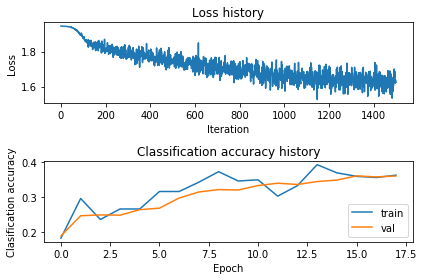

( 6 / 10 )
iteration 0 / 1500: loss 1.945938
iteration 100 / 1500: loss 1.884058
iteration 200 / 1500: loss 1.827515
iteration 300 / 1500: loss 1.832629
iteration 400 / 1500: loss 1.755826
iteration 500 / 1500: loss 1.783120
iteration 600 / 1500: loss 1.702379
iteration 700 / 1500: loss 1.709766
iteration 800 / 1500: loss 1.698326
iteration 900 / 1500: loss 1.712605
iteration 1000 / 1500: loss 1.660543
iteration 1100 / 1500: loss 1.699054
iteration 1200 / 1500: loss 1.692837
iteration 1300 / 1500: loss 1.633528
iteration 1400 / 1500: loss 1.652042


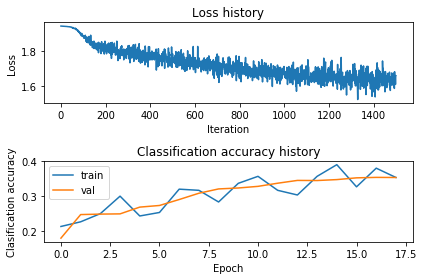

( 7 / 10 )
iteration 0 / 1500: loss 1.945949
iteration 100 / 1500: loss 1.939913
iteration 200 / 1500: loss 1.899162
iteration 300 / 1500: loss 1.873284
iteration 400 / 1500: loss 1.808524
iteration 500 / 1500: loss 1.806479
iteration 600 / 1500: loss 1.808960
iteration 700 / 1500: loss 1.747806
iteration 800 / 1500: loss 1.788107
iteration 900 / 1500: loss 1.727348
iteration 1000 / 1500: loss 1.755017
iteration 1100 / 1500: loss 1.742010
iteration 1200 / 1500: loss 1.800493
iteration 1300 / 1500: loss 1.755792
iteration 1400 / 1500: loss 1.766193


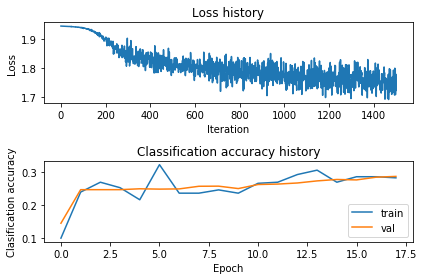

( 8 / 10 )
iteration 0 / 1500: loss 1.945988
iteration 100 / 1500: loss 1.866187
iteration 200 / 1500: loss 1.816723
iteration 300 / 1500: loss 1.773804
iteration 400 / 1500: loss 1.745480
iteration 500 / 1500: loss 1.695398
iteration 600 / 1500: loss 1.697407
iteration 700 / 1500: loss 1.712767
iteration 800 / 1500: loss 1.672560
iteration 900 / 1500: loss 1.725024
iteration 1000 / 1500: loss 1.669321
iteration 1100 / 1500: loss 1.638551
iteration 1200 / 1500: loss 1.596831
iteration 1300 / 1500: loss 1.638840
iteration 1400 / 1500: loss 1.562063


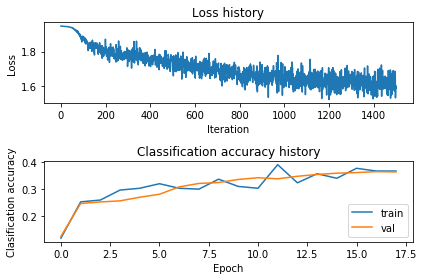

( 9 / 10 )
iteration 0 / 1500: loss 1.945905
iteration 100 / 1500: loss 1.894382
iteration 200 / 1500: loss 1.802279
iteration 300 / 1500: loss 1.809780
iteration 400 / 1500: loss 1.791283
iteration 500 / 1500: loss 1.735524
iteration 600 / 1500: loss 1.723360
iteration 700 / 1500: loss 1.693266
iteration 800 / 1500: loss 1.672318
iteration 900 / 1500: loss 1.739294
iteration 1000 / 1500: loss 1.663772
iteration 1100 / 1500: loss 1.682300
iteration 1200 / 1500: loss 1.650782
iteration 1300 / 1500: loss 1.621537
iteration 1400 / 1500: loss 1.677630


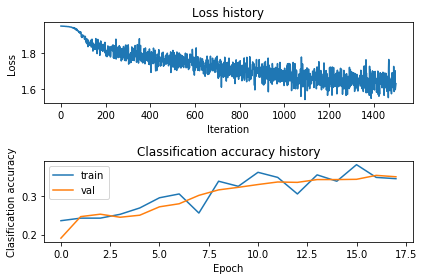

lr 1.104302e-04 reg 2.603815e-05 train accuracy: 0.297289 val accuracy: 0.290000
lr 1.228001e-04 reg 5.070215e-05 train accuracy: 0.310047 val accuracy: 0.310667
lr 2.327315e-04 reg 2.904779e-05 train accuracy: 0.366448 val accuracy: 0.357333
lr 2.360597e-04 reg 2.276121e-05 train accuracy: 0.366837 val accuracy: 0.358000
lr 2.499418e-04 reg 1.781329e-05 train accuracy: 0.371154 val accuracy: 0.366333
lr 2.637368e-04 reg 7.552710e-05 train accuracy: 0.373838 val accuracy: 0.368333
lr 2.765058e-04 reg 1.442279e-05 train accuracy: 0.377455 val accuracy: 0.368000
lr 2.885744e-04 reg 4.167496e-05 train accuracy: 0.379400 val accuracy: 0.370000
lr 6.090738e-04 reg 8.623619e-05 train accuracy: 0.444241 val accuracy: 0.417000
lr 9.005531e-04 reg 7.205143e-05 train accuracy: 0.489673 val accuracy: 0.418333
best validation accuracy achieved during cross-validation: 0.418333


In [37]:
from random import uniform
best_net = None # store the best model into this 
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
results = {}
best_val = -1
best_net = None
learning_rate_decay = 0.95
input_size = 48 * 48
hidden_size = 150
num_classes = 7

# net = TwoLayerNet(input_size, hidden_size, num_classes)

# # Train the network
# stats = net.train(X_train, y_train, X_val, y_val,
#             num_iters=1500, batch_size=300,
#             learning_rate=1e-3, learning_rate_decay=0.95,
#             reg=0.2, verbose=True)

# # Predict on the validation set
# val_acc = (net.predict(X_val) == y_val).mean()
# print('Validation accuracy: ', val_acc)
# best_net = net
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
# Your code
#For each learning_rates and regularization_strengths
# for lr in learning_rates:
#     for reg in regularization_strengths:
max_count = 10
for count in range(max_count):
        print("(", count, "/", max_count, ")")
        reg = 10**uniform(-5, -4)
        lr = 10**uniform(-3, -4)
        #Create a LinearSoftmax object
        new_twoLayerNet = TwoLayerNet(input_size, hidden_size, num_classes)
        #Train the X-train, y_train
        new_loss_hist = new_twoLayerNet.train(X_train, y_train, X_val, y_val, lr, \
                                              learning_rate_decay,reg, num_iters=1500, batch_size=300, verbose=True)
        #Calculate prediction on X_train
        new_y_train_pred = new_twoLayerNet.predict(X_train)
        #Calculate accuracy on prediction on X_train
        train_acc = np.mean(y_train == new_y_train_pred)
        #Calculate prediction on X_val
        new_y_val_pred = new_twoLayerNet.predict(X_val)
        #Calculate accuracy on prediction on X_val
        val_acc = np.mean(y_val == new_y_val_pred)
        #Store in results
        results[(lr, reg)] = (train_acc, val_acc)
        #Display the best accuracy
        if(val_acc > best_val):
            best_val = val_acc
            best_net = new_twoLayerNet
        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(new_loss_hist['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(new_loss_hist['train_acc_history'], label='train')
        plt.plot(new_loss_hist['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

(2304, 500)


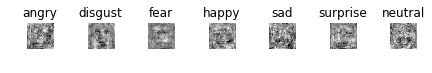

In [38]:
# visualize the weights of the best network
show_net_weights(best_net, hidden_size)

In [34]:
test_acc = (best_net.predict(X_pub_test) == y_pub_test).mean()
print('Public Test accuracy: ', test_acc)
test_acc = (best_net.predict(X_pri_test) == y_pri_test).mean()
print('Private Test accuracy: ', test_acc)

Public Test accuracy:  0.399
Private Test accuracy:  0.425
